<h1>Laptop Industry</h1>
<br>
<img src="word_cloud.png" width="1000" height="25" style="text-align: left">       

<p>
My first interaction with a computer was back in 2005, and desktops were very common, mostly stationed in offices.Compare the same to today where things have changed and almost everyone owns a personal laptop,there are various factors that influence the purchase of a laptop.

    
Personally got the previllege of owning a desktop in 2010 which served me for a while, it was more of an etertainment unit, fast forward to 2023 where my opinion on the use of a computer has really changed, instead of being an entertainment unit the same is used at home for running programs to ease my work.
  

<br>    
Ahead of purchasing a personal laptop there are various factors that are considered, again depending on the industry that one is in.
    
<br>
Kaggle uploaded some data on their repository on the laptops, this analysis will look into these features that make a laptop what they are and how the same influence prices.

</p>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\KEVIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
laptop = pd.read_excel("laptops_train.xlsx")
laptop.head(5)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [5]:
#Columns that influence the prices of laptop
laptop.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [6]:
laptop.shape

(977, 13)

* The data has 977 rows with 13 columns features

In [7]:
round(laptop.isna().sum()/laptop.shape[0]*100,2)

Manufacturer                 0.00
Model Name                   0.00
Category                     0.00
Screen Size                  0.00
Screen                       0.00
CPU                          0.00
RAM                          0.00
Storage                      0.00
GPU                          0.00
Operating System             0.00
Operating System Version    13.92
Weight                       0.00
Price                        0.00
dtype: float64

#### The data is clean apart from the operating system version that has 13.92% of empty cells

In [8]:
#Drop the operating version column as the same comes as an update.
new_data = laptop.drop(["Operating System Version"], axis=1)
new_data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20


In [47]:
manu_lap = laptop["Manufacturer"].unique()
print(f"World renowned maunfacturers are: {len(manu_lap)}")

World renowned maunfacturers are: 19


In [10]:
# Mau=nufacturers
print("Leading laptop manufacturers")
for idx, lap in enumerate(manu_lap):
    print(f"{idx +1 }. {lap}")

Leading laptop manufacturers
1. Apple
2. HP
3. Acer
4. Asus
5. Dell
6. Lenovo
7. Chuwi
8. MSI
9. Microsoft
10. Toshiba
11. Huawei
12. Xiaomi
13. Vero
14. Razer
15. Mediacom
16. Samsung
17. Google
18. Fujitsu
19. LG


In [11]:
#Number of models 
model_name = new_data["Model Name"].unique()
len(model_name)

488

In [12]:
models_manu = new_data[["Manufacturer",  "Model Name"]].drop_duplicates()
models_manu.head()

,Manufacturer,Model Name
0,Apple,MacBook Pro
1,Apple,Macbook Air
2,HP,250 G6
5,Acer,Aspire 3
8,Asus,ZenBook UX430UN


In [13]:
models = models_manu.groupby("Manufacturer").count().sort_values(by="Model Name", ascending=False)
models.head()

,Model Name
Manufacturer,
Lenovo,110
Asus,100
HP,97
Dell,52
Acer,45


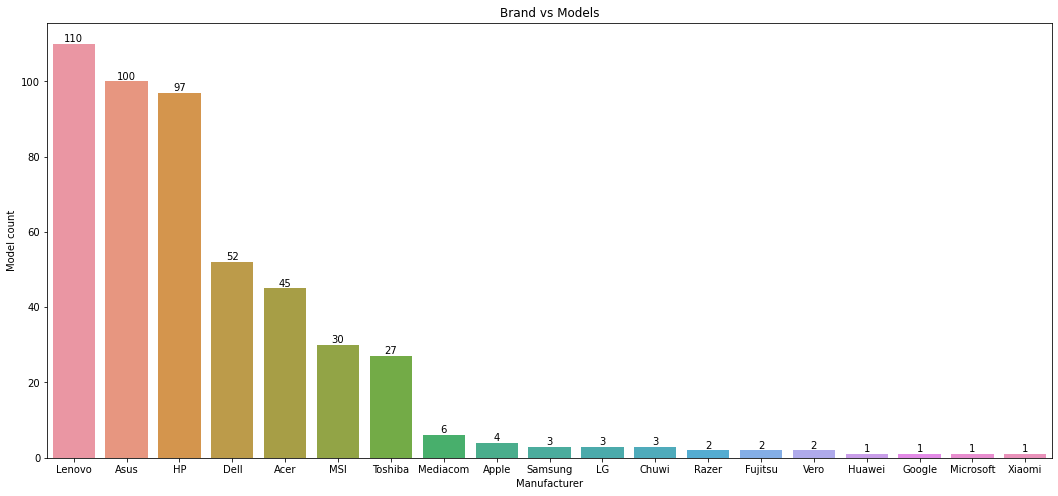

In [14]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)
sns.barplot(x = models.index,
           y = models["Model Name"])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Brand vs Models")
plt.ylabel("Model count")
plt.show()

### Models 
1. Lenovo has more models as compared to the other brands
2. Huawei, Google, Microsoft and Xiaomo based on these data have atleast 1 model
3. Top 5 brands with more models are Acer, Dell, HP, Asus

In [15]:
new_data["Category"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

<h4> 2-in-1 convertibles</h4>are tablets with in which the keyboard can be rotated, folded, or slid behind the display
<h4>Workstation</h4> a high-performance computer system that is basically designed for a single user and has advanced graphics capabilities, large storage capacity, and a powerful central processing unit.
<h4>Ultrabook</h4> a specific type of ultramobile notebook, defined by Intel. Ultrabooks are thin, lightweight and offer longer battery life by utilizing new low-power CPUs integrated with instant-on capability, all without compromising performance.
<h4>Gaming laptops</h4> designed to provide the necessary power to run high-end games with high-quality graphics and fast processing speeds. They often feature a powerful CPU, a high-end GPU, and plenty of RAM to ensure smooth gameplay.
<h4>Notebooks</h4> can perform most of the same functions as a desktop workstation, but their portability, light weight and compact size make them more versatile than a desk-bound computer. Traveling employees can take their notebook with them, along with any application and data access they need. Workplace flexibility.

In [16]:
data_category = new_data[["Manufacturer","Category"]]
data_category

,Manufacturer,Category
0,Apple,Ultrabook
1,Apple,Ultrabook
2,HP,Notebook
3,Apple,Ultrabook
4,Apple,Ultrabook
...,...,...
972,Dell,Gaming
973,Toshiba,Notebook
974,Asus,Gaming
975,HP,Notebook


In [17]:
data_category

,Manufacturer,Category
0,Apple,Ultrabook
1,Apple,Ultrabook
2,HP,Notebook
3,Apple,Ultrabook
4,Apple,Ultrabook
...,...,...
972,Dell,Gaming
973,Toshiba,Notebook
974,Asus,Gaming
975,HP,Notebook


In [18]:
lap_cat = pd.pivot_table(
    data_category, 
    values=["Category"],
    index=data_category["Manufacturer"],
    columns=data_category["Category"],
    aggfunc="count",
    fill_value=0
)
lap_cat
# lap_cat["Totals"] =lap_cat["2 in 1 Convertible"] + lap_cat["Gaming"]+lap_cat["Netbook"] +lap_cat["Notebook"] + lap_cat["Ultrabook"] + lap_cat["Workstation"]

Category                                              
Category     2 in 1 Convertible Gaming Netbook Notebook Ultrabook Workstation
Manufacturer                                                                 
Acer                          7      6       4       62         4           0
Apple                         0      0       0        0        17           0
Asus                         12     38       3       53        16           0
Chuwi                         0      0       0        3         0           0
Dell                         17     36       2      129        37          11
Fujitsu                       0      0       0        2         0           0
Google                        0      0       0        0         3           0
HP                           16     10       4      119        21           9
Huawei                        0      0       0        0         2           0
LG                            0      0       0        0         3           0
Lenovo                       31     22       3      140        26           4
MSI                           0     34       0        0         0           0
Mediacom                      1      0       0        6         0           0
Microsoft                     0      0       0        0         6           0
Razer                         0      4       0        0         1           0
Samsung                       1      0       1        1         5           0
Toshiba                       0      0       0       30         9           0
Vero                          0      0       0        2         0           0
Xiaomi                        0      0       0        2         2           0

In [19]:
lap_cat.columns

MultiIndex([('Category', '2 in 1 Convertible'),
            ('Category',             'Gaming'),
            ('Category',            'Netbook'),
            ('Category',           'Notebook'),
            ('Category',          'Ultrabook'),
            ('Category',        'Workstation')],
           names=[None, 'Category'])

In [20]:
lap_cat.rename(columns ={"('Category', '2 in 1 Convertible')": "convertible"})

Category                                              
Category     2 in 1 Convertible Gaming Netbook Notebook Ultrabook Workstation
Manufacturer                                                                 
Acer                          7      6       4       62         4           0
Apple                         0      0       0        0        17           0
Asus                         12     38       3       53        16           0
Chuwi                         0      0       0        3         0           0
Dell                         17     36       2      129        37          11
Fujitsu                       0      0       0        2         0           0
Google                        0      0       0        0         3           0
HP                           16     10       4      119        21           9
Huawei                        0      0       0        0         2           0
LG                            0      0       0        0         3           0
Lenovo                       31     22       3      140        26           4
MSI                           0     34       0        0         0           0
Mediacom                      1      0       0        6         0           0
Microsoft                     0      0       0        0         6           0
Razer                         0      4       0        0         1           0
Samsung                       1      0       1        1         5           0
Toshiba                       0      0       0       30         9           0
Vero                          0      0       0        2         0           0
Xiaomi                        0      0       0        2         2           0

In [21]:
lap_cat.columns

MultiIndex([('Category', '2 in 1 Convertible'),
            ('Category',             'Gaming'),
            ('Category',            'Netbook'),
            ('Category',           'Notebook'),
            ('Category',          'Ultrabook'),
            ('Category',        'Workstation')],
           names=[None, 'Category'])

In [22]:
lap_cat["Totals"] = lap_cat[('Category', '2 in 1 Convertible')]+lap_cat[('Category',             'Gaming')]+lap_cat[('Category',            'Netbook')]+lap_cat[('Category',           'Notebook')]+lap_cat[('Category',          'Ultrabook')]+lap_cat[('Category',          'Ultrabook')]

In [23]:
lap_cat.sort_values(by="Totals", ascending=False).head(5)

Category                                                \
Category     2 in 1 Convertible Gaming Netbook Notebook Ultrabook Workstation   
Manufacturer                                                                    
Dell                         17     36       2      129        37          11   
Lenovo                       31     22       3      140        26           4   
HP                           16     10       4      119        21           9   
Asus                         12     38       3       53        16           0   
Acer                          7      6       4       62         4           0   

             Totals  
Category             
Manufacturer         
Dell            258  
Lenovo          248  
HP              191  
Asus            138  
Acer             87

In [24]:
plot_table = lap_cat.iloc[0:,0:6]

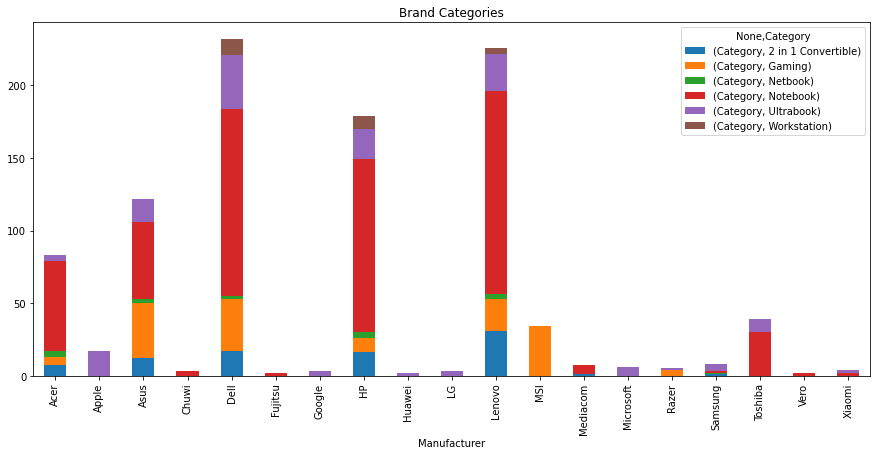

In [25]:

plot_table.plot.bar(stacked=True, figsize=(15,6.5), title = "Brand Categories")
plt.show()

#### Notes on the Brand categories
1. The ultra laptops cuts across all the brands apart from the Chuwi, Fujitsu, MSI, Mediacom and Vero
2. Dell, HP and Lenovo are in all the categories
3. Interesting that workstation is not that common across
4. 9 of the brands focus on one category, the other 10 focus on 2 or more

In [26]:
new_data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20


In [27]:
screen_size = new_data["Screen Size"].unique()
sizes = []
for s in screen_size:
    sizes.append(s.replace('"', ""))
sizes = pd.DataFrame(sizes)
sizes.sort_values(by=0, ascending=True)

,0
7,10.1
17,11.3
5,11.6
4,12.0
13,12.3
9,12.5
10,13.0
0,13.3
8,13.5
12,13.9


<li><strong>The screen-sizes range from 10.1 - 18.4 Inches</strong></li>

In [28]:
screen_type = new_data["Screen"].unique()
print(f"We have atleast {len(screen_type)} screen types")

We have atleast 38 screen types


In [29]:
for idx, a in enumerate(screen_type):
    print(f"{idx +1 }. {a}")

1. IPS Panel Retina Display 2560x1600
2. 1440x900
3. Full HD 1920x1080
4. IPS Panel Retina Display 2880x1800
5. 1366x768
6. IPS Panel Full HD 1920x1080
7. IPS Panel Retina Display 2304x1440
8. IPS Panel Full HD / Touchscreen 1920x1080
9. Full HD / Touchscreen 1920x1080
10. Touchscreen / Quad HD+ 3200x1800
11. IPS Panel Touchscreen 1920x1200
12. Touchscreen 2256x1504
13. Quad HD+ / Touchscreen 3200x1800
14. IPS Panel 1366x768
15. IPS Panel 4K Ultra HD / Touchscreen 3840x2160
16. IPS Panel Full HD 2160x1440
17. 4K Ultra HD / Touchscreen 3840x2160
18. Touchscreen 2560x1440
19. 1600x900
20. IPS Panel 4K Ultra HD 3840x2160
21. 4K Ultra HD 3840x2160
22. Touchscreen 1366x768
23. IPS Panel Full HD 1366x768
24. IPS Panel 2560x1440
25. IPS Panel Full HD 2560x1440
26. IPS Panel Retina Display 2736x1824
27. Touchscreen 2400x1600
28. 2560x1440
29. IPS Panel Quad HD+ 2560x1440
30. IPS Panel Quad HD+ 3200x1800
31. IPS Panel Quad HD+ / Touchscreen 3200x1800
32. IPS Panel Touchscreen 1366x768
33. 1920x

#### CPU
The Central Processing Unit (CPU) is the primary component of a computer that acts as its “control center.” The CPU, also referred to as the “central” or “main” processor, is a complex set of electronic circuitry that runs the machine's operating system and apps.

In [30]:
cpu =new_data["CPU"].unique()
print(f"The number of CPU as per the data {len(cpu)}")

The number of CPU as per the data 106


In [31]:
for idx, c in enumerate(cpu):
    print(f"{idx + 1}.{c}")

1.Intel Core i5 2.3GHz
2.Intel Core i5 1.8GHz
3.Intel Core i5 7200U 2.5GHz
4.Intel Core i7 2.7GHz
5.Intel Core i5 3.1GHz
6.AMD A9-Series 9420 3GHz
7.Intel Core i7 2.2GHz
8.Intel Core i7 8550U 1.8GHz
9.Intel Core i5 8250U 1.6GHz
10.Intel Core i3 6006U 2GHz
11.Intel Core i7 2.8GHz
12.Intel Core M m3 1.2GHz
13.Intel Core i7 7500U 2.7GHz
14.Intel Core i7 2.9GHz
15.Intel Core i3 7100U 2.4GHz
16.Intel Atom x5-Z8350 1.44GHz
17.Intel Core i5 7300HQ 2.5GHz
18.AMD E-Series E2-9000e 1.5GHz
19.Intel Core i5 1.6GHz
20.Intel Core i7 8650U 1.9GHz
21.Intel Atom x5-Z8300 1.44GHz
22.AMD E-Series E2-6110 1.5GHz
23.AMD A6-Series 9220 2.5GHz
24.Intel Celeron Dual Core N3350 1.1GHz
25.Intel Core i3 7130U 2.7GHz
26.Intel Core i7 7700HQ 2.8GHz
27.Intel Core i5 2.0GHz
28.AMD Ryzen 1700 3GHz
29.Intel Pentium Quad Core N4200 1.1GHz
30.Intel Atom x5-Z8550 1.44GHz
31.Intel Celeron Dual Core N3060 1.6GHz
32.Intel Core i5 1.3GHz
33.AMD FX 9830P 3GHz
34.Intel Core i7 7560U 2.4GHz
35.AMD E-Series 6110 1.5GHz
36.Intel 

<p>The common processors are</p>
<li>Intel</li>
<li>Amad</li>

In [32]:
new_data["RAM"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB'],
      dtype=object)

##### *Memory range from 2GB to 24GB but the same is expandale*

In [33]:
storage = new_data["Storage"].unique()
print(f"Based on the data we have {len(storage)} storage types")

Based on the data we have 36 storage types


- Flash storage refers to the use of solid-state drives (SSDs) comprising flash memory (i.e. an "all-flash array") for the mass storage of data or files. Flash storage offers an alternative to relying on hard disk drives (HDDs) or other media for storage.


- SSDs are smaller and faster than hard disk drives (HDDs). SSDs are noiseless and allow PCs to be thinner and more lightweight


- Hard disk drive (HDD), hard disk, hard drive, or fixed disk,[b] is an electro-mechanical data storage device that stores and retrieves digital data using magnetic storage with one or more rigid rapidly rotating platters coated with magnetic material. -The platters are paired with magnetic heads, usually arranged on a moving actuator arm, which read and write data to the platter surfaces

In [34]:
for idx, a in enumerate(storage):
    print(f"{idx +1}. {a}")

1. 128GB SSD
2. 128GB Flash Storage
3. 256GB SSD
4. 512GB SSD
5. 500GB HDD
6. 256GB Flash Storage
7. 1TB HDD
8. 32GB Flash Storage
9. 128GB SSD +  1TB HDD
10. 256GB SSD +  256GB SSD
11. 64GB Flash Storage
12. 256GB SSD +  1TB HDD
13. 256GB SSD +  2TB HDD
14. 32GB SSD
15. 2TB HDD
16. 64GB SSD
17. 1TB Hybrid
18. 512GB SSD +  1TB HDD
19. 1TB SSD
20. 256GB SSD +  500GB HDD
21. 128GB SSD +  2TB HDD
22. 512GB SSD +  512GB SSD
23. 16GB SSD
24. 16GB Flash Storage
25. 512GB SSD +  256GB SSD
26. 512GB SSD +  2TB HDD
27. 64GB Flash Storage +  1TB HDD
28. 1GB SSD
29. 1TB HDD +  1TB HDD
30. 32GB HDD
31. 1TB SSD +  1TB HDD
32. 512GB Flash Storage
33. 128GB HDD
34. 240GB SSD
35. 8GB SSD
36. 508GB Hybrid


#### GPU
* The graphics processing unit, or GPU, has become one of the most important types of computing technology, both for personal and business computing. Designed for parallel processing, the GPU is used in a wide range of applications, including graphics and video rendering. Although they’re best known for their capabilities in gaming, GPUs are becoming more popular for use in creative production and artificial intelligence (AI).

In [35]:
gpu = new_data["GPU"].unique()
print(f"The GPU in the market based on the data is {len(gpu)}")

The GPU in the market based on the data is 96


In [36]:
for idx, a in enumerate(gpu):
    print(f"{idx+1}. {a}")

1. Intel Iris Plus Graphics 640
2. Intel HD Graphics 6000
3. Intel HD Graphics 620
4. AMD Radeon Pro 455
5. Intel Iris Plus Graphics 650
6. AMD Radeon R5
7. Intel Iris Pro Graphics
8. Nvidia GeForce MX150
9. Intel UHD Graphics 620
10. Intel HD Graphics 520
11. AMD Radeon Pro 555
12. AMD Radeon R5 M430
13. Intel HD Graphics 615
14. AMD Radeon Pro 560
15. Nvidia GeForce 940MX
16. Intel HD Graphics 400
17. Nvidia GeForce GTX 1050
18. AMD Radeon R2
19. AMD Radeon 530
20. Nvidia GeForce 930MX
21. Intel HD Graphics
22. Intel HD Graphics 500
23. Nvidia GeForce GTX 1060
24. Nvidia GeForce 150MX
25. Intel Iris Graphics 540
26. AMD Radeon RX 580
27. Nvidia GeForce 920MX
28. AMD Radeon R4 Graphics
29. AMD Radeon 520
30. Nvidia GeForce GTX 1070
31. Nvidia GeForce GTX 1050 Ti
32. Nvidia GeForce MX130
33. AMD R4 Graphics
34. Nvidia GeForce GTX 940MX
35. AMD Radeon RX 560
36. Nvidia GeForce 920M
37. AMD Radeon R7 M445
38. AMD Radeon RX 550
39. Nvidia GeForce GTX 1050M
40. Intel HD Graphics 515
41. AM

In [37]:
gpu_details = pd.DataFrame(gpu)
gpu_expanded = gpu_details[0].str.split(' ', expand=True)
gpu_expanded

,0,1,2,3,4
0,Intel,Iris,Plus,Graphics,640
1,Intel,HD,Graphics,6000,None
2,Intel,HD,Graphics,620,None
3,AMD,Radeon,Pro,455,None
4,Intel,Iris,Plus,Graphics,650
...,...,...,...,...,...
91,AMD,Radeon,R7,M465,None
92,AMD,Radeon,R3,None,None
93,Nvidia,GeForce,GTX,1050Ti,None
94,AMD,Radeon,R7,M365X,None


In [38]:
gpu_expanded.groupby(0).count().iloc[0:,1]

0
AMD       32
Intel     22
Nvidia    41
Name: 2, dtype: int64

#### *The GPU market is dominated by three companies, in terms of the products NVidia has more brands as compared to competitors*


In [39]:
operating_system = new_data['Operating System'].unique()
operating_system

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

### The common operating systems are :-
1. Mac OS
2. Windows
3. Linux
4. Android
5. Chrome OS

In [40]:
top_20 = new_data.sort_values(by="Price", ascending=False)

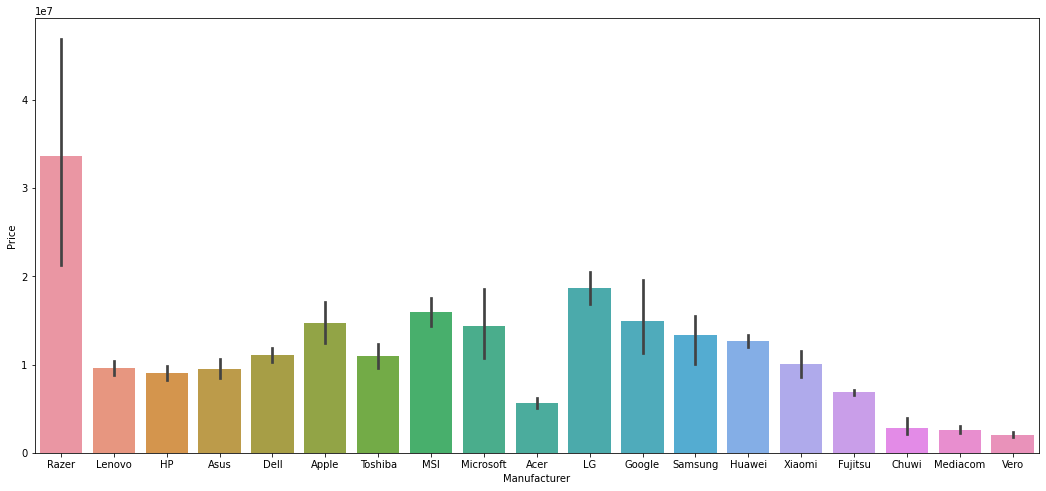

In [44]:
plt.figure(figsize=(18, 8))
sns.barplot(data = top_20, x = "Manufacturer", y="Price")
plt.show()

#### Pricing of Brands
1. Gaming category are quite pricey the Razer feature alot in terms of their pricing
2. Workstations follow through, players such as HP, Dell and Lenovo dominate
3. Notebooks comes through in third 

In [46]:
top_20.head(20)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
196,Razer,Blade Pro,Gaming,"17.3""",4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows,3.49kg,54232308.00
830,Razer,Blade Pro,Gaming,"17.3""",4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows,3.49kg,48897108.00
610,Lenovo,Thinkpad P51,Notebook,"15.6""",IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows,2.5kg,43561908.00
749,HP,Zbook 17,Workstation,"17.3""",IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows,3kg,39026988.00
238,Asus,ROG G703VI-E5062T,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows,4.7kg,34589880.00
723,Dell,Alienware 17,Gaming,"17.3""",4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.36kg,32539384.80
780,Dell,Alienware 17,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows,4.42kg,31911609.60
744,Lenovo,Thinkpad P51s,Workstation,"15.6""",IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16GB,1TB SSD,Nvidia Quadro M520M,Windows,2.5kg,29334708.00
955,Dell,Alienware 17,Gaming,"17.3""",IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.36kg,28045368.00
968,Dell,Alienware 17,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42kg,28000908.00


#### Factors influencing pricing

<li>The prices in the data may be too high but in the market, apart from the <strong>category</strong> there other factors the influence the price of a laptop, <strong>GPU, CPU, Screen type</strong> play a huge role in the final mark up price.</li>

### Conclusion
*One has to make a decison regarding what they want to own in terms of a laptop, money has to be spent based on quality, the learning from the analysis is that the small details in laptop is what makes it pricey, over the years things such as screen, <strong>GPU</strong> and <strong>RAM</strong> have been mentioned but the same were disregarded*